**Importing the requried modules**


In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

**Reading into a DataFrame**

In [ ]:
fake_news=pd.read_csv('/content/drive/MyDrive/Fake.csv')
true_news=pd.read_csv('/content/drive/MyDrive/True.csv')

**Print First Five rows**

In [ ]:
print(fake_news.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [ ]:
print(true_news.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


**Finding the number of Rows and Columns**

In [ ]:
fake_news.shape

(23481, 4)

In [ ]:
true_news.shape

(21417, 4)

**Checking if any columns is empty**

In [ ]:
fake_news=fake_news.sample(n=21400)

In [ ]:
fake_news.shape


(21400, 4)

In [ ]:
fake_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
true_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0


**Creating new columns where fakenews column is 1 and truenews is 0**

In [ ]:
fake_news['class']=1
true_news['class']=0

**Printing first five rows**

In [ ]:
fake_news.head()

,title,text,subject,date,class
2975,Vladimir Putin Just Defended Trump In The WOR...,"According to Russian dictator Vladimir Putin, ...",News,"January 17, 2017",1
5608,Watch A Trump Supporter GO BONKERS Trying To ...,Anyone trying to defend Donald Trump after his...,News,"July 4, 2016",1
18293,CHEVY CHASE ADMITS To Using Position At SNL To...,Comedian Mark Dice explores the influence so-c...,left-news,"Jul 18, 2017",1
19926,GRAB THE POPCORN! Queen Of Corruption DENIED S...,The Drudge Report has gained access to the rul...,left-news,"Sep 24, 2016",1
20783,BREAKING: HILLARY CLINTON’S Comments On The ‘R...,The unborn person is how Clinton describes t...,left-news,"Apr 3, 2016",1


In [ ]:
true_news.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


**Joining the fakenews and truenews dataset**

In [ ]:
news_data=pd.concat([fake_news,true_news],axis=0)

**Checking the number of fake news and true news**

<Axes: ylabel='count'>

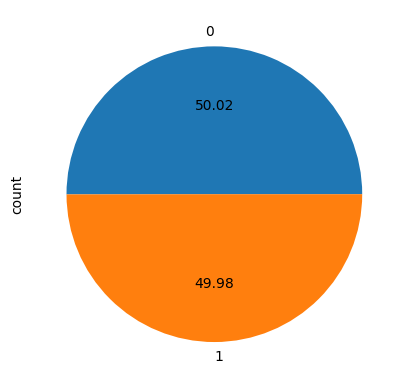

In [ ]:
news_data['class'].value_counts().plot.pie(autopct='%.2f')

You can ignore the above value since there is no huge gap between the fake news and true news data

**Printing first five rows of new data**

In [ ]:
news_data.head()

,title,text,subject,date,class
2975,Vladimir Putin Just Defended Trump In The WOR...,"According to Russian dictator Vladimir Putin, ...",News,"January 17, 2017",1
5608,Watch A Trump Supporter GO BONKERS Trying To ...,Anyone trying to defend Donald Trump after his...,News,"July 4, 2016",1
18293,CHEVY CHASE ADMITS To Using Position At SNL To...,Comedian Mark Dice explores the influence so-c...,left-news,"Jul 18, 2017",1
19926,GRAB THE POPCORN! Queen Of Corruption DENIED S...,The Drudge Report has gained access to the rul...,left-news,"Sep 24, 2016",1
20783,BREAKING: HILLARY CLINTON’S Comments On The ‘R...,The unborn person is how Clinton describes t...,left-news,"Apr 3, 2016",1


**since my fake news are all at top and true news as bottom we are re sampling the news_data**

In [ ]:
news_data=news_data.sample(frac=1)
news_data.reset_index(inplace=True)
news_data.drop(['index'],axis=1,inplace=True)

**Checking if Data is Mixed properly**

In [ ]:
news_data.head()

,title,text,subject,date,class
0,Liz Cheney's Wyoming campaign backed by big na...,"CODY, Wyo. (Reuters) - Former Vice President D...",politicsNews,"August 13, 2016",0
1,Trump to speak with British prime minister May...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 14, 2017",0
2,OBAMACARE: Your Dog Might Have Better Healthca...,Simon Black Sovereign ManBelow is a short emai...,Middle-east,"November 2, 2016",1
3,TRUMP SETS THE RECORD STRAIGHT: Slams NYT Then...,,left-news,"Nov 16, 2016",1
4,Merkel says good chance to start next phase of...,BRUSSELS (Reuters) - German Chancellor Angela ...,worldnews,"December 14, 2017",0


**Contradiction words used to replace in title**

In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I shall",
"I'll've": "I shall have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she has",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

**Function that clean the newsdata**

In [ ]:
def cont_text(x):
  if type(x) is str:
    x=x.replace('\\','')
    for key in contractions:
      value=contractions[key]
      x=x.replace(key,value)
    return x
  else:
    return x

**Applying the Above function**

In [ ]:
news_data['text']=news_data['text'].apply(lambda x:cont_text(x))

**Since we are using only text we are droping the other columns**

In [ ]:
news_data.drop(['title','subject','date'],axis=1,inplace=True)

In [ ]:
news_data.head()

,text,class
0,"CODY, Wyo. (Reuters) - Former Vice President D...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,0
2,Simon Black Sovereign ManBelow is a short emai...,1
3,,1
4,BRUSSELS (Reuters) - German Chancellor Angela ...,0


**We are selecting text and numeric data only**-

In [ ]:
def steaming(text):
  stemmed_content=re.sub(r"[^a-zA-Z0-9'\s]",' ',text)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content


In [ ]:
news_data['news']=news_data['text'].apply(lambda x:steaming(x))

In [ ]:
news_data.head()

,text,class,news
0,"CODY, Wyo. (Reuters) - Former Vice President D...",0,cody wyo reuters former vice president dick ch...
1,WASHINGTON (Reuters) - U.S. President Donald T...,0,washington reuters u s president donald trump ...
2,Simon Black Sovereign ManBelow is a short emai...,1,simon black sovereign manbelow is a short emai...
3,,1,
4,BRUSSELS (Reuters) - German Chancellor Angela ...,0,brussels reuters german chancellor angela merk...


**spliting x any y**

In [ ]:
x=news_data['news'].values
y=news_data['class'].values

In [ ]:
print(x)

['cody wyo reuters former vice president dick cheney s eldest daughter bouncing back from an aborted 2014 u s senate bid heads into a crowded primary race next week for wyoming s lone seat in the house of representatives buoyed by big name republicans and wealthy out of state donors liz cheney the apparent republican front runner has commanded a level of fund raising and a list party support including two former presidents and onetime cabinet members that is rare if not unheard of for a relative newcomer to wyoming politics her strength is even more significant in a solidly red state where the republican primary winner is virtually assured victory in the general election she can go to chicago or new york and in one fund raiser pull in more money than the next two closest candidates combined said deb oakley simpson a daughter in law of former longtime wyoming republican senator alan simpson and a cody based civic activist who backs one of cheney s primary foes state senator leland chris

In [ ]:
print(y)

[0 0 1 ... 1 0 0]


**Coverting my text data into numeric values to fit our model**

In [ ]:
vectoriser=TfidfVectorizer()
x=vectoriser.fit_transform(x)

In [ ]:
print(x)

  (0, 25867)	0.09723733713188731
  (0, 116349)	0.05939622941698851
  (0, 90012)	0.009933339748619924
  (0, 42318)	0.12999963704911183
  (0, 112199)	0.04593968035164394
  (0, 84009)	0.028971179373655027
  (0, 32647)	0.037261930460058885
  (0, 24030)	0.5331570515255243
  (0, 36569)	0.041137529430438524
  (0, 30350)	0.054849036300897734
  (0, 19247)	0.05422486044870355
  (0, 14694)	0.014957792508039644
  (0, 43088)	0.057974509240344155
  (0, 11416)	0.017008801970664865
  (0, 8305)	0.04389238658352602
  (0, 1812)	0.021916882347681802
  (0, 95055)	0.01808109866130639
  (0, 17357)	0.05406420822515169
  (0, 49029)	0.028534247225930755
  (0, 54631)	0.012540415511955536
  (0, 28956)	0.038497029771813705
  (0, 84238)	0.12354898201191565
  (0, 86492)	0.0876509425972063
  (0, 74367)	0.0339729210031621
  (0, 114159)	0.02981765952656708
  :	:
  (42816, 98762)	0.05737178361369839
  (42816, 89544)	0.07240089088707571
  (42816, 57198)	0.05552330535295231
  (42816, 102846)	0.05166415626447042
  (42816, 

**Spliting our data in train and test data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

**Using My Machine Learing model logisticregression**

In [ ]:
model=LogisticRegression()

**Fitting my Traning data**

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

**Predicting the accuracy score of traning data**

In [ ]:
x_train_prediction=model.predict(x_train)
training_data_accuarcy=accuracy_score(x_train_prediction,y_train)

**Accuary score is 99.16% which is Good**

In [ ]:
print("Accuracy score of training data is:",training_data_accuarcy)

Accuracy score of traning data is: 0.990336612851429


**Predicting the Accuracy score of test data**

In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

**Accuracy score is 98.76% which is good**

In [ ]:
print("Accuracy score of test data is: ",test_data_accuracy)

Accuracy score of test data is:  0.9857543204110228


**Model decision tree classifier**

In [ ]:
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
x_train_prediction2=model2.predict(x_train)
training_data_accuarcy2=accuracy_score(x_train_prediction2,y_train)

**Accuracy score of training data:99.997**

In [ ]:
print("Accuracy score of training data is:",training_data_accuarcy2)

Accuracy score of traning data is: 0.9999708054768925


In [ ]:
x_test_prediction2=model2.predict(x_test)
test_data_accuracy2=accuracy_score(x_test_prediction2,y_test)

**Accuracy score of test data:99.57**

In [ ]:
print("Accuracy score of test data is: ",test_data_accuracy2)

Accuracy score of test data is:  0.9955628211116301


**Model RandomForestClassifier**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
x_train_prediction3=rf_clf.predict(x_train)
training_data_accuarcy3=accuracy_score(x_train_prediction3,y_train)

**Accuracy score of training is 99.9970**

In [ ]:
print("Accuracy score of Training data is: ",training_data_accuarcy3)

Accuracy score of test data is:  0.9999708054768925


In [ ]:
x_test_prediction3=rf_clf.predict(x_test)
test_data_accuracy3=accuracy_score(x_test_prediction3,y_test)

**Accuracy score of test data is 98.8907**

In [ ]:
print("Accuracy score of test data is: ",test_data_accuracy3)

Accuracy score of test data is:  0.9889070527790752


In [ ]:
dict_score={
    'log':traning_data_accuarcy,
    'tree':traning_data_accuarcy2,
    'forest':traning_data_accuarcy3
}

In [ ]:
dict_score_test={
    'log':test_data_accuracy,
    'tree':test_data_accuracy2,
    'forest':test_data_accuracy3
}

In [ ]:
traning_df=pd.DataFrame(dict_score,index=['score'])

In [ ]:
test_df=pd.DataFrame(dict_score_test,index=['score'])

**Graph of training data Accuracy**

<Axes: >

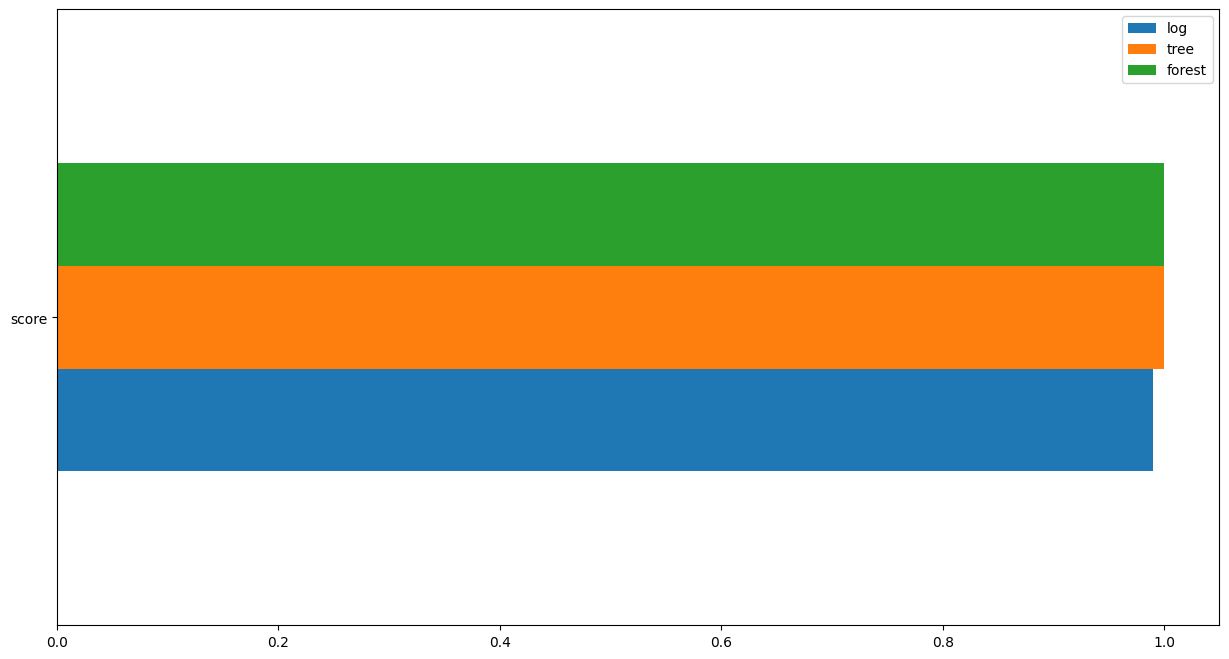

In [ ]:
traning_df.plot(kind='barh', figsize=(15, 8))

**Graph of Test data Accuracy**

<Axes: >

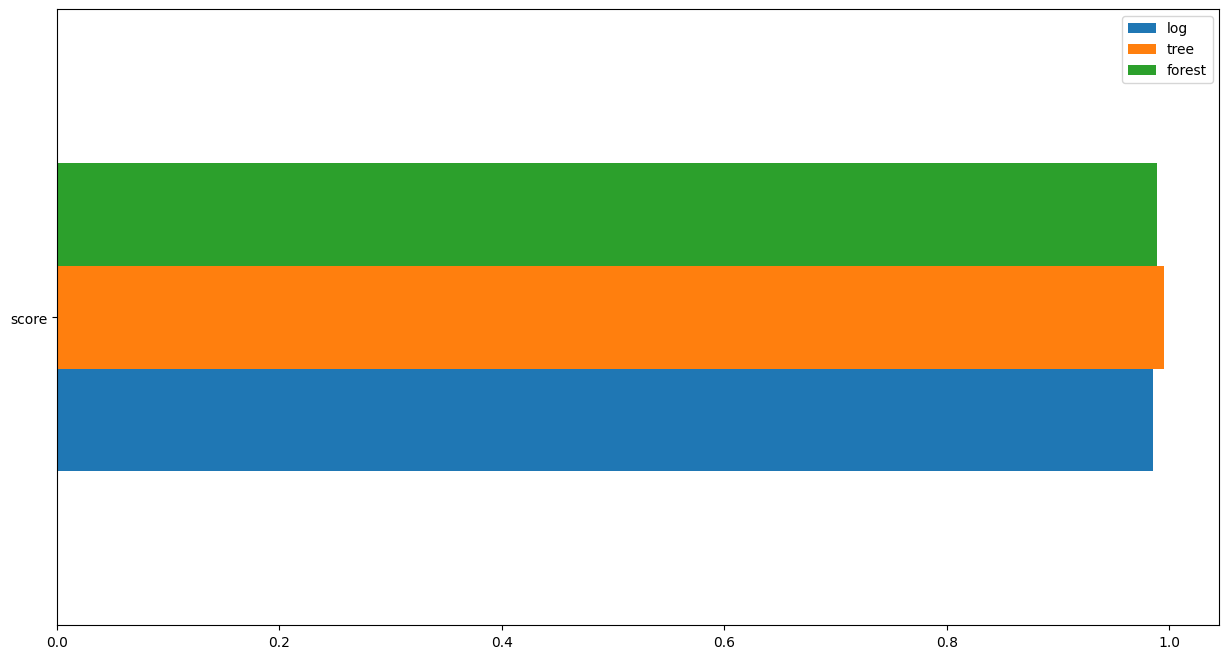

In [ ]:
test_df.plot(kind='barh', figsize=(15, 8))

**Buliding an user interface**

In [ ]:
title="Pokémon TCG Pocket Event: From November 22 to November 28, 2024, players can participate in the Fire Pokémon Mass Outbreak event, offering opportunities to collect free Fire-type cards, including Arcanine EX and Charizard. "
content=cont_text(title)
content=steaming(content)
input_data=content
input_data=vectoriser.transform([input_data])

prediction=model.predict(input_data)
prediction2=model2.predict(input_data)
print(prediction)
if(prediction==0):
  print("Real News")
else:
  print("Fake News")
if(prediction2==0):
  print("real news")
else:
  print("Fake news")


[1]
Fake News
Fake news


**Downloading the models and vectoriser**

In [ ]:
filename='news_data_model.sav'
vector='news_data_vectoriser.sav'
modelDecision='model_decision_tree.sav'
pickle.dump(model2,open(modelDecision,'wb'))
pickle.dump(model,open(filename,'wb'))
pickle.dump(vectoriser,open(vector,'wb'))

In [ ]:
model=pickle.load(open('news_data_model.sav','rb'))
vectoriser=pickle.load(open('news_data_vectoriser.sav','rb'))